<font size=6><b>금융 Pandas

In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Data Load

In [8]:
sdate = '2020-01-01'
edate = '2020-06-30'
tsdf = yf.download("TSLA", sdate, edate)
ssdf = yf.download("005930.KS", sdate, edate)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
tsdf.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500


In [10]:
ssdf.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,50894.554688,12993228
2020-01-03,56000.0,56600.0,54900.0,55500.0,51171.156250,15422255


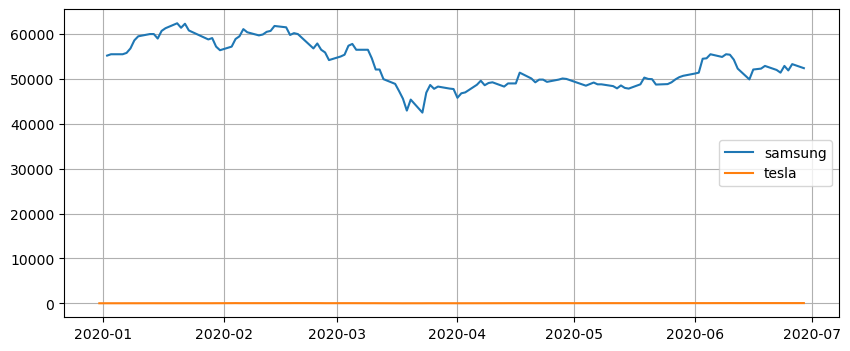

In [11]:
plt.figure(figsize=(10,4))
plt.plot(ssdf["Close"] , label="samsung")
plt.plot(tsdf["Close"], label="tesla")
plt.legend()
plt.grid()
plt.show()


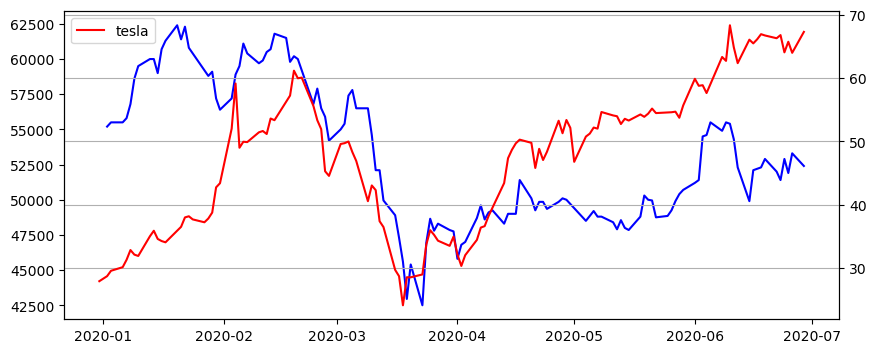

In [12]:
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(ssdf.index, ssdf['Close'], color="blue", label="samsung")
ax2 = ax1.twinx() 
ax2.plot(tsdf.index, tsdf['Close'], color="red", label="tesla")
plt.legend()
plt.grid()
plt.show()

# 지수화
* 가격이 다른 두 주가의 비교

## shift(N)
* N일 대비 가격 증감에 주로 사용

In [13]:
ssdf["close_shift"] = ssdf["Close"].shift(1)
ssdf.head()

,Open,High,Low,Close,Adj Close,Volume,close_shift
Date,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,50894.554688,12993228,NaN
2020-01-03,56000.0,56600.0,54900.0,55500.0,51171.156250,15422255,55200.0
2020-01-06,54900.0,55600.0,54600.0,55500.0,51171.156250,10278951,55500.0
2020-01-07,55700.0,56400.0,55600.0,55800.0,51447.753906,10009778,55500.0
2020-01-08,56200.0,57400.0,55900.0,56800.0,52369.753906,23501171,55800.0


In [14]:
ssdf["close_shift-1"] = ssdf["Close"].shift(-1)
ssdf.tail()

,Open,High,Low,Close,Adj Close,Volume,close_shift,close_shift-1
Date,,,,,,,,
2020-06-23,52500.0,52800.0,51100.0,51400.0,47740.847656,18086152,52000.0,52900.0
2020-06-24,51900.0,53900.0,51600.0,52900.0,49134.058594,24519552,51400.0,51900.0
2020-06-25,52100.0,53000.0,51900.0,51900.0,48205.250000,18541624,52900.0,53300.0
2020-06-26,52800.0,53900.0,52200.0,53300.0,49505.582031,21575360,51900.0,52400.0
2020-06-29,52500.0,53200.0,52000.0,52400.0,48995.066406,17776925,53300.0,NaN


In [15]:
ssdf.head()

,Open,High,Low,Close,Adj Close,Volume,close_shift,close_shift-1
Date,,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,50894.554688,12993228,NaN,55500.0
2020-01-03,56000.0,56600.0,54900.0,55500.0,51171.156250,15422255,55200.0,55500.0
2020-01-06,54900.0,55600.0,54600.0,55500.0,51171.156250,10278951,55500.0,55800.0
2020-01-07,55700.0,56400.0,55600.0,55800.0,51447.753906,10009778,55500.0,56800.0
2020-01-08,56200.0,57400.0,55900.0,56800.0,52369.753906,23501171,55800.0,58600.0


In [16]:
# 전일 대비 오늘의 가격차
ssdf['close_diff'] = ssdf['Close']  - ssdf['close_shift']
ssdf.head()

,Open,High,Low,Close,Adj Close,Volume,close_shift,close_shift-1,close_diff
Date,,,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,50894.554688,12993228,NaN,55500.0,NaN
2020-01-03,56000.0,56600.0,54900.0,55500.0,51171.156250,15422255,55200.0,55500.0,300.0
2020-01-06,54900.0,55600.0,54600.0,55500.0,51171.156250,10278951,55500.0,55800.0,0.0
2020-01-07,55700.0,56400.0,55600.0,55800.0,51447.753906,10009778,55500.0,56800.0,300.0
2020-01-08,56200.0,57400.0,55900.0,56800.0,52369.753906,23501171,55800.0,58600.0,1000.0


## 변동가 : diff(N) ★★★
* colse  - close.shift(1)

In [17]:
ssdf["cose_diff"] = ssdf['Close'].diff(1)
ssdf.head()

,Open,High,Low,Close,Adj Close,Volume,close_shift,close_shift-1,close_diff,cose_diff
Date,,,,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,50894.554688,12993228,NaN,55500.0,NaN,NaN
2020-01-03,56000.0,56600.0,54900.0,55500.0,51171.156250,15422255,55200.0,55500.0,300.0,300.0
2020-01-06,54900.0,55600.0,54600.0,55500.0,51171.156250,10278951,55500.0,55800.0,0.0,0.0
2020-01-07,55700.0,56400.0,55600.0,55800.0,51447.753906,10009778,55500.0,56800.0,300.0,300.0
2020-01-08,56200.0,57400.0,55900.0,56800.0,52369.753906,23501171,55800.0,58600.0,1000.0,1000.0


## 변동률 : pct_change(N) ★★★
* 전일 대비 오늘 수익률
* (colse  - close.shift(1)) / close.shift(1)
* 오늘가격 - 어제산가격 / 어제산가격

In [18]:
ssdf["cose_pct_change"] = ssdf['Close'].pct_change(1) 
ssdf.head()

,Open,High,Low,Close,Adj Close,Volume,close_shift,close_shift-1,close_diff,cose_diff,cose_pct_change
Date,,,,,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,50894.554688,12993228,NaN,55500.0,NaN,NaN,NaN
2020-01-03,56000.0,56600.0,54900.0,55500.0,51171.156250,15422255,55200.0,55500.0,300.0,300.0,0.005435
2020-01-06,54900.0,55600.0,54600.0,55500.0,51171.156250,10278951,55500.0,55800.0,0.0,0.0,0.000000
2020-01-07,55700.0,56400.0,55600.0,55800.0,51447.753906,10009778,55500.0,56800.0,300.0,300.0,0.005405
2020-01-08,56200.0,57400.0,55900.0,56800.0,52369.753906,23501171,55800.0,58600.0,1000.0,1000.0,0.017921


## 이동평균 : rolling(5)
* 5 20 60 120

In [19]:
ssdf["ma5"] = ssdf['Close'].rolling(5).mean()
ssdf.head()

,Open,High,Low,Close,Adj Close,Volume,close_shift,close_shift-1,close_diff,cose_diff,cose_pct_change,ma5
Date,,,,,,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,50894.554688,12993228,NaN,55500.0,NaN,NaN,NaN,NaN
2020-01-03,56000.0,56600.0,54900.0,55500.0,51171.156250,15422255,55200.0,55500.0,300.0,300.0,0.005435,NaN
2020-01-06,54900.0,55600.0,54600.0,55500.0,51171.156250,10278951,55500.0,55800.0,0.0,0.0,0.000000,NaN
2020-01-07,55700.0,56400.0,55600.0,55800.0,51447.753906,10009778,55500.0,56800.0,300.0,300.0,0.005405,NaN
2020-01-08,56200.0,57400.0,55900.0,56800.0,52369.753906,23501171,55800.0,58600.0,1000.0,1000.0,0.017921,55760.0


## resample()

In [20]:
#매월초
ssdf['Close'].resample(rule="MS").first()

Date
2020-01-01    55200.0
2020-02-01    57200.0
2020-03-01    55000.0
2020-04-01    45800.0
2020-05-01    48500.0
2020-06-01    51200.0
Freq: MS, Name: Close, dtype: float64

In [21]:
#매월말
ssdf['Close'].resample(rule="M").first()

Date
2020-01-31    55200.0
2020-02-29    57200.0
2020-03-31    55000.0
2020-04-30    45800.0
2020-05-31    48500.0
2020-06-30    51200.0
Freq: M, Name: Close, dtype: float64

In [22]:
#매달 평균가
ssdf['Close'].resample(rule="M").mean()

Date
2020-01-31    58815.000000
2020-02-29    59085.000000
2020-03-31    50331.818182
2020-04-30    49045.000000
2020-05-31    49100.000000
2020-06-30    52995.238095
Freq: M, Name: Close, dtype: float64

In [23]:
ssdf.head()

,Open,High,Low,Close,Adj Close,Volume,close_shift,close_shift-1,close_diff,cose_diff,cose_pct_change,ma5
Date,,,,,,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,50894.554688,12993228,NaN,55500.0,NaN,NaN,NaN,NaN
2020-01-03,56000.0,56600.0,54900.0,55500.0,51171.156250,15422255,55200.0,55500.0,300.0,300.0,0.005435,NaN
2020-01-06,54900.0,55600.0,54600.0,55500.0,51171.156250,10278951,55500.0,55800.0,0.0,0.0,0.000000,NaN
2020-01-07,55700.0,56400.0,55600.0,55800.0,51447.753906,10009778,55500.0,56800.0,300.0,300.0,0.005405,NaN
2020-01-08,56200.0,57400.0,55900.0,56800.0,52369.753906,23501171,55800.0,58600.0,1000.0,1000.0,0.017921,55760.0


## 결측 채우기

In [24]:
ssdf['close_shift'] = ssdf['close_shift'].fillna(method='bfill')  #-- 앞에데이터가져와서 채우기
ssdf.head()

,Open,High,Low,Close,Adj Close,Volume,close_shift,close_shift-1,close_diff,cose_diff,cose_pct_change,ma5
Date,,,,,,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,50894.554688,12993228,55200.0,55500.0,NaN,NaN,NaN,NaN
2020-01-03,56000.0,56600.0,54900.0,55500.0,51171.156250,15422255,55200.0,55500.0,300.0,300.0,0.005435,NaN
2020-01-06,54900.0,55600.0,54600.0,55500.0,51171.156250,10278951,55500.0,55800.0,0.0,0.0,0.000000,NaN
2020-01-07,55700.0,56400.0,55600.0,55800.0,51447.753906,10009778,55500.0,56800.0,300.0,300.0,0.005405,NaN
2020-01-08,56200.0,57400.0,55900.0,56800.0,52369.753906,23501171,55800.0,58600.0,1000.0,1000.0,0.017921,55760.0


In [25]:
ssdf.tail()

,Open,High,Low,Close,Adj Close,Volume,close_shift,close_shift-1,close_diff,cose_diff,cose_pct_change,ma5
Date,,,,,,,,,,,,
2020-06-23,52500.0,52800.0,51100.0,51400.0,47740.847656,18086152,52000.0,52900.0,-600.0,-600.0,-0.011538,52160.0
2020-06-24,51900.0,53900.0,51600.0,52900.0,49134.058594,24519552,51400.0,51900.0,1500.0,1500.0,0.029183,52300.0
2020-06-25,52100.0,53000.0,51900.0,51900.0,48205.250000,18541624,52900.0,53300.0,-1000.0,-1000.0,-0.018904,52220.0
2020-06-26,52800.0,53900.0,52200.0,53300.0,49505.582031,21575360,51900.0,52400.0,1400.0,1400.0,0.026975,52300.0
2020-06-29,52500.0,53200.0,52000.0,52400.0,48995.066406,17776925,53300.0,NaN,-900.0,-900.0,-0.016886,52380.0


In [26]:
ssdf['close_shift-1'] = ssdf['close_shift-1'].fillna(method='ffill')  #-- 뒤에데이터가져와서 채우기
ssdf.tail()

,Open,High,Low,Close,Adj Close,Volume,close_shift,close_shift-1,close_diff,cose_diff,cose_pct_change,ma5
Date,,,,,,,,,,,,
2020-06-23,52500.0,52800.0,51100.0,51400.0,47740.847656,18086152,52000.0,52900.0,-600.0,-600.0,-0.011538,52160.0
2020-06-24,51900.0,53900.0,51600.0,52900.0,49134.058594,24519552,51400.0,51900.0,1500.0,1500.0,0.029183,52300.0
2020-06-25,52100.0,53000.0,51900.0,51900.0,48205.250000,18541624,52900.0,53300.0,-1000.0,-1000.0,-0.018904,52220.0
2020-06-26,52800.0,53900.0,52200.0,53300.0,49505.582031,21575360,51900.0,52400.0,1400.0,1400.0,0.026975,52300.0
2020-06-29,52500.0,53200.0,52000.0,52400.0,48995.066406,17776925,53300.0,52400.0,-900.0,-900.0,-0.016886,52380.0


In [27]:
ssdf = ssdf.fillna(method='ffill')
ssdf = ssdf.fillna(method='bfill')
print(ssdf.isna().sum())
ssdf.head()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
close_shift        0
close_shift-1      0
close_diff         0
cose_diff          0
cose_pct_change    0
ma5                0
dtype: int64


,Open,High,Low,Close,Adj Close,Volume,close_shift,close_shift-1,close_diff,cose_diff,cose_pct_change,ma5
Date,,,,,,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,50894.554688,12993228,55200.0,55500.0,300.0,300.0,0.005435,55760.0
2020-01-03,56000.0,56600.0,54900.0,55500.0,51171.156250,15422255,55200.0,55500.0,300.0,300.0,0.005435,55760.0
2020-01-06,54900.0,55600.0,54600.0,55500.0,51171.156250,10278951,55500.0,55800.0,0.0,0.0,0.000000,55760.0
2020-01-07,55700.0,56400.0,55600.0,55800.0,51447.753906,10009778,55500.0,56800.0,300.0,300.0,0.005405,55760.0
2020-01-08,56200.0,57400.0,55900.0,56800.0,52369.753906,23501171,55800.0,58600.0,1000.0,1000.0,0.017921,55760.0


## 보유기간 수익률
*  현재가격 - 첫매수가격 / 첫매수가격

### 특정일자에서의 보유기간 수익률

In [28]:
dfcp = ssdf.loc['2020-01-08': '2020-02-28']
print((dfcp.loc['2020-02-28']['Close'] / dfcp.loc['2020-01-08']['Close']) - 1)

-0.045774647887323994


### 전체 레코드 기준 보유기간 수익률

In [29]:
ssdf.index.min() ,ssdf.index.max()

(Timestamp('2020-01-02 00:00:00'), Timestamp('2020-06-29 00:00:00'))

In [30]:
ago_price = ssdf.iloc[0]['Close']
today_price = ssdf.iloc[-1]['Close']
print(ago_price, today_price)

55200.0 52400.0


In [31]:
보유기간6개월수익률 = (today_price /ago_price) -1
보유기간6개월수익률

-0.050724637681159424

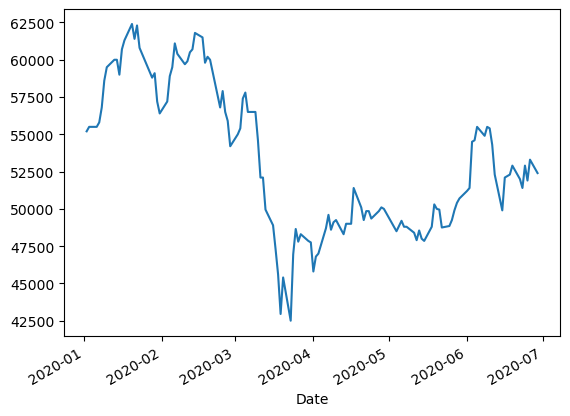

In [32]:
ssdf['Close'].plot()
plt.show()

### 년간 보유기간 수익률 - 기하평균
* (현재가격 - 첫매수가격 / 첫매수가격) ^y    - 1   (y=1년기준)
* 2년 6개월 == 2.5
*     6개월 == 0.5

In [33]:
년간보유기간수익률 =  ((today_price/ago_price) ** 0.5) -1
년간보유기간수익률

-0.025692367720112408

## 가중평균수익률

In [34]:
price = np.array([100,200,300,400])
weight = np.array([0.2,0.4,0.3,0.1])  # == 1.0

# ( 100*0.2 )  + 
wsum = np.dot(price, weight.reshape(-1))
wsum       

230.0

In [35]:
port_ratios = []
price = np.array([100,200,300,400])
for i in range(10):
    port_ratio = np.random.rand(4) # 4가지 랜덤 실수 조합
    port_ratio = port_ratio / port_ratio.sum() # 합계가 1인 랜덤 실수   
    wsum = np.dot(price, port_ratio.reshape(-1))
    port_ratios.append((port_ratio, wsum))
port_ratios

[(array([0.83635129, 0.0642571 , 0.04075883, 0.05863278]), 132.16731060130283),
 (array([0.08364017, 0.52263144, 0.31132952, 0.08239887]), 239.24870977805054),
 (array([0.46591736, 0.04234599, 0.27771956, 0.21401709]), 223.98363758701686),
 (array([0.19392913, 0.08342511, 0.06729473, 0.65535103]), 318.40676630917903),
 (array([0.11157787, 0.25101895, 0.27954445, 0.35785873]), 288.3684042190957),
 (array([0.44130382, 0.3143759 , 0.00419403, 0.24012625]), 204.31426966511142),
 (array([0.02595225, 0.0965921 , 0.35864822, 0.51880743]), 337.03108200465664),
 (array([0.23936017, 0.44952249, 0.03095503, 0.28016231]), 235.19194735733095),
 (array([0.37735295, 0.35114272, 0.09935958, 0.17214476]), 206.62961407486665),
 (array([0.03928437, 0.27391626, 0.37203549, 0.31476388]), 296.22788712930276)]

* 원금 10000 배당금 1000 만기1년 수익률10% 기대 수익률은?

In [37]:
fv = 10000 * (1+0.1)
fv

11000.0

In [38]:
((11000 + 1000) / 10000) -1

0.19999999999999996

## 누적 수익률

### 전체 보유기간 누적 수익가

In [39]:
# 누적 수익가  diff= 오늘-어제shift(-1)
ssdf['close_cumsum'] = ssdf['close_diff'].cumsum()
ssdf.tail(1)  #-2500.0

,Open,High,Low,Close,Adj Close,Volume,close_shift,close_shift-1,close_diff,cose_diff,cose_pct_change,ma5,close_cumsum
Date,,,,,,,,,,,,,
2020-06-29,52500.0,53200.0,52000.0,52400.0,48995.066406,17776925,53300.0,52400.0,-900.0,-900.0,-0.016886,52380.0,-2500.0


### 월별 누적 수익가
* 월말 기준

In [40]:
ssdf['mm'] = ssdf.index
ssdf['mm'] = pd.to_datetime(ssdf['mm']).dt.strftime("%Y-%m")
ssdf.head(2)

,Open,High,Low,Close,Adj Close,Volume,close_shift,close_shift-1,close_diff,cose_diff,cose_pct_change,ma5,close_cumsum,mm
Date,,,,,,,,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,50894.554688,12993228,55200.0,55500.0,300.0,300.0,0.005435,55760.0,300.0,2020-01
2020-01-03,56000.0,56600.0,54900.0,55500.0,51171.156250,15422255,55200.0,55500.0,300.0,300.0,0.005435,55760.0,600.0,2020-01


In [41]:
ssdf['Close'].resample(rule="M").sum().cumsum()

Date
2020-01-31    1176300.0
2020-02-29    2358000.0
2020-03-31    3465300.0
2020-04-30    4446200.0
2020-05-31    5379100.0
2020-06-30    6492000.0
Freq: M, Name: Close, dtype: float64

In [42]:
ssdf[ssdf["mm"]=="2020-01"]['Close'].cumsum()[-1]

1176300.0

### 전체 보유기간 누적 수익률

In [43]:
ssdf['close_cumprod'] = (ssdf['cose_pct_change']+1).cumprod() - 1
ssdf['close_cumprod'].tail(1)   #-0.045566

Date
2020-06-29   -0.045566
Name: close_cumprod, dtype: float64

In [44]:
s = ssdf['Close'].head(1).values[0]
e = ssdf['Close'].tail(1).values[0]
s, e

(55200.0, 52400.0)

### 월별 누적 수익률 -- 비추
* 월말 기준

In [45]:
# ssdf['cose_pct_change'].resample(rule="M")
(1+ssdf['cose_pct_change']).resample('M').prod()

Date
2020-01-31    1.027292
2020-02-29    0.960993
2020-03-31    0.880996
2020-04-30    1.047120
2020-05-31    1.014000
2020-06-30    1.033531
Freq: M, Name: cose_pct_change, dtype: float64

# 변동계수 
* 편차를 평균으로 나눈 것

In [ ]:
vc = ssdf['Close'].std() / ssdf['Close'].mean() * 100
vc

9.224919523588508